In [1]:
# File: linear_regression_tictactoe.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/tictactoe_games.csv'
data = pd.read_csv(file_path)

# Preprocessing: Convert moves to numeric values
def move_to_numeric(move):
    if move == "---":
        return -1  # Encode empty moves as -1
    else:
        row, col = map(int, move.split("-"))
        return row * 3 + col  # Convert (Row-Col) to a single integer (0-8)

# Apply the transformation to all move columns
move_columns = [col for col in data.columns if "Move" in col]
for col in move_columns:
    data[col] = data[col].apply(move_to_numeric)

# Create a new column: Total valid moves (target variable)
data['Move_Count'] = (data[move_columns] != -1).sum(axis=1)

# Split the data into features (X) and target (y)
X = data[move_columns]
y = data['Move_Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Show sample predictions
sample_results = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10]
})
print("\nSample Predictions:\n", sample_results)


Mean Squared Error (MSE): 0.1100719139462668
R-squared (R2): 0.8538273560284062

Sample Predictions:
    Actual  Predicted
0       7   7.216534
1       8   8.445606
2       7   7.044891
3       7   7.416118
4       9   9.224174
5       9   8.830088
6       9   9.265047
7       9   8.607420
8       9   8.781271
9       9   8.992832


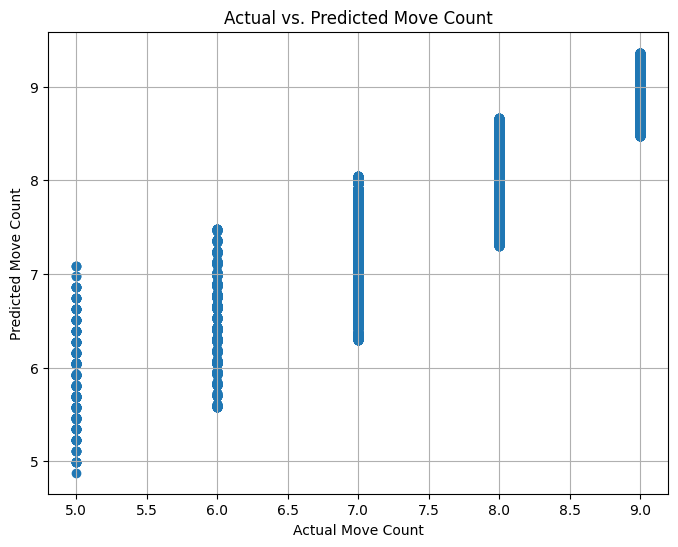

In [3]:
# prompt: scatter plot of it

import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from the previous code
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Move Count")
plt.ylabel("Predicted Move Count")
plt.title("Actual vs. Predicted Move Count")
plt.grid(True)
plt.show()

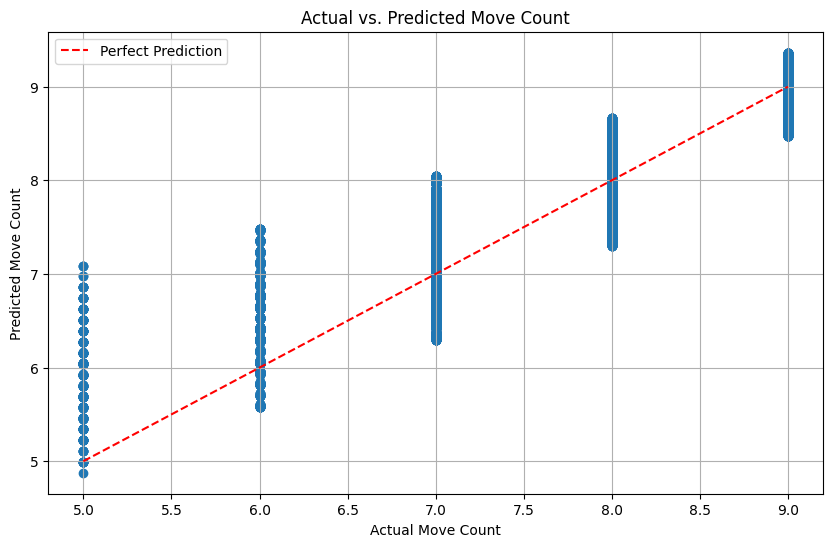

In [2]:
# prompt: plot the graph

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Move Count")
plt.ylabel("Predicted Move Count")
plt.title("Actual vs. Predicted Move Count")
plt.legend()
plt.grid(True)
plt.show()